<a href="https://colab.research.google.com/github/zoeyee0821/skills-introduction-to-github/blob/main/maio2026_public_lecture_computer_vision_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Detection

Pneumonia is a significant cause of morbidity and mortality worldwide, particularly among children and the elderly. Early and accurate diagnosis through Chest X-Rays (CXR) is critical for effective treatment.

Below is code to download a dataset of chest X-ray images. Some images are taken from healthy people, while some are taken from pneumonia patients.

Your task: given the images in `train.zip`,  build an image classification model to predict the class of images in `test.zip`. The labels of the test images are provided to you in `test_labels.csv` so that you can cross check model performance yourself!

Here's some material to get you started: https://docs.pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [1]:
!wget -O train.zip https://storage.googleapis.com/aiolympiadmy_public/maio2026_public_lectures/pl2026_computer_vision_train.zip
!wget -O test.zip https://storage.googleapis.com/aiolympiadmy_public/maio2026_public_lectures/pl2026_computer_vision_test.zip
!wget -O test_labels.csv https://storage.googleapis.com/aiolympiadmy_public/maio2026_public_lectures/pl2026_computer_vision_test_labels.csv

--2026-01-20 12:06:04--  https://storage.googleapis.com/aiolympiadmy_public/maio2026_public_lectures/pl2026_computer_vision_train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1143347942 (1.1G) [application/x-zip-compressed]
Saving to: ‘train.zip’

train.zip           100%[===================>]   1.06G  19.3MB/s    in 56s     

2026-01-20 12:07:02 (19.4 MB/s) - ‘train.zip’ saved [1143347942/1143347942]

--2026-01-20 12:07:02--  https://storage.googleapis.com/aiolympiadmy_public/maio2026_public_lectures/pl2026_computer_vision_test.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting 

In [2]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: NORMAL/IM-0701-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-1041-0001.jpeg  
  inflating: NORMAL/IM-0499-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0473-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0451-0001.jpeg  
  inflating: NORMAL/IM-0272-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0919-0001.jpeg  
  inflating: NORMAL/IM-0569-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0908-0001.jpeg  
  inflating: NORMAL/IM-0203-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0700-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0551-0001.jpeg  
  inflating: NORMAL/IM-0434-0001.jpeg  
  inflating: NORMAL/IM-0304-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0810-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0448-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0904-0001.jpeg  
  inflating: NORMAL/IM-0160-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-1002-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-0630-0001.jpeg  
  inflating: NORMAL/NORMAL2-IM-1376-0001.jpeg  
  inf

In [53]:
!ls train/NORMAL | wc -l

1341


In [54]:
!ls train/PNEUMONIA | wc -l

3875


In [3]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/15fcab26142849e3b5c7e30b23d4eee8.jpeg  
  inflating: test/338a98bdc9df772595451d4168add7cb.jpeg  
  inflating: test/859424d2fb529fce8680e3adf5130032.jpeg  
  inflating: test/86eb7d3d24f8af79fe3b96043ab36b99.jpeg  
  inflating: test/dbcd991c857f9fe6e1d3721abe8f72ec.jpeg  
  inflating: test/89a0e3174200f2c64d0fb537a8aa10ea.jpeg  
  inflating: test/f8f493b61ccf8b564f2434a801895971.jpeg  
  inflating: test/ed38e2a748ba2a4db8e8f76e8e2ae0a5.jpeg  
  inflating: test/f4f1663f841ee194ab7bd7b66fd087de.jpeg  
  inflating: test/3deb1050070c178df4427072d5531470.jpeg  
  inflating: test/0f12746abc6c1ae4f75b37eec8fb972a.jpeg  
  inflating: test/843930bc5e684083fe859fb4516c1105.jpeg  
  inflating: test/bc0575cfe93a2d6fc14d75567774c763.jpeg  
  inflating: test/f1fa1a647f90fd9c075a0aad56a25923.jpeg  
  inflating: test/2a4dbe3fdb0790bb6db86f81e03a5ed8.jpeg  
  inflating: test/4c94b21a4ced490a2d8612398fc52d58.jpeg  
  inflating: test/c03314b5b853c973

In [4]:
!head -n20 test_labels.csv

,fname,labels
0,6531fdd12f45e57bf7513342c53b5aec,NORMAL
1,ed38e2a748ba2a4db8e8f76e8e2ae0a5,NORMAL
2,736d143f0fd446fe15f7f229daf416a1,NORMAL
3,d11b1623451f67af449096b19b12db4e,PNEUMONIA
4,745e4a856069ee57dd14852a2426cc82,PNEUMONIA
5,080b5a0b03c1bf95ed99f31e9c6d7a37,PNEUMONIA
6,b176e2025cdbebeb24c7966a46edb1d0,NORMAL
7,2bec40f8a6ed2149d8e95f22c81388e7,PNEUMONIA
8,9e49919df167bacc0f70acbb8e71978e,NORMAL
9,f0c9a8794723b136a2ff985324d102c8,PNEUMONIA
10,2f308355cd32e3c8cd7c616e4d212b16,NORMAL
11,b774105b864f3eb6b8eb3edf4a2b1c1c,PNEUMONIA
12,7daf484bbe71b9f959a9237546442085,PNEUMONIA
13,8c9066b4ad91f039741f1ca3f6c18de3,PNEUMONIA
14,7476fd66b9c6bfacdb6945e93b2e6b1b,PNEUMONIA
15,c1bf253a5b128f57a1a74877bb1e772a,NORMAL
16,5f915c1b1869aa72a3e8ebc2fec0b5fb,PNEUMONIA
17,c437a5d21387d388e196f83b20ad8bf0,PNEUMONIA
18,0f12746abc6c1ae4f75b37eec8fb972a,NORMAL


In [5]:
!ls

NORMAL	PNEUMONIA  sample_data	test  test_labels.csv  test.zip  train.zip


In [6]:
!rm -rf train

In [7]:
!mkdir train

In [8]:
!mv NORMAL train

In [9]:
!mv PNEUMONIA train

In [10]:
!ls train

NORMAL	PNEUMONIA


In [11]:
from PIL import Image

In [12]:
def show_one_img(fpath=str):
  im = Image.open(fpath)
  print(im.size)
  im = im.resize((200,200))
  return im


(712, 439)


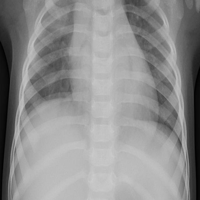

In [13]:
show_one_img("train/PNEUMONIA/person1_bacteria_1.jpeg")

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("test_labels.csv",index_col=0)

In [16]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default>, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool | lib.NoDefault' = <no_default>, date_parser: 'Callable | lib.NoDefault' = <no_default>, date_format: 'str | dict[Hashable, str] | None' = None, dayfirst: 'bool' = False, cache_dates: 'bool' = True, iterator: 'bool' = False, chunksize: 'int | None' = None, compression: 'CompressionOptions' = 'infer', thousands: 'str | None' = None, decimal: 'str' = '.', lineterminator: 'str | None' = None, quotechar: 'str' = '"', quoting: 'int' = 0, doublequote: 'bool' = True, escapechar: 'str | None' = None, comment: 'str | None' = None, encoding: 'str | None' = None, encoding_errors: 'str | None' = 'strict', dialect: 'str | csv.Dialect | None' = None, on_bad_lines: 'str' = 'error', delim_whitespace: 'bool | lib.NoDefault' = <no_default>, low_memory: 'bool' = True, memory_map: 'bool' = False, float_precision: "Literal['high', 'legacy'] | None" = None, storage_options: 'StorageOptions | None' = None, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>) -> 'DataFrame | TextFileReader'>

In [17]:
df.tail()

,fname,labels
619,cadbfbb6353744a1db3e49b943132bf7,PNEUMONIA
620,1c3dbb85c3deb2c8802388dad0dd85bd,PNEUMONIA
621,9acbf1892d7d56c7f618727e7a0f4908,NORMAL
622,7e36629947cb260a0c79d9117ce6fcc9,PNEUMONIA
623,83199df7cd5dcc6993551c23208757e4,NORMAL


Checking step - if file name to label is correct.

In [18]:
fname2label = {}

for dx,srs in df.iterrows():
  fname2label[srs["fname"]] = srs["labels"]


In [19]:
print(fname2label.get('9acbf1892d7d56c7f618727e7a0f4908'))
print(fname2label.get('7e36629947cb260a0c79d9117ce6fcc9'))

NORMAL
PNEUMONIA


# Data Preprocessing and Loading


In [20]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

Train dataset

In [59]:
#Define Dataset
##Different Augmentations
train_dataset = ImageFolder("train", transform = transforms.Compose([
    # This combines resizing and cropping into one 'zoom' effect
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),

    transforms.RandomRotation(20), # Increased slightly
    transforms.RandomHorizontalFlip(),

    # Adding 'Sharpness' helps with X-ray clarity variations
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),

    # Randomly change brightness/contrast/saturation
    transforms.ColorJitter(brightness=0.2, contrast=0.2),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))


In Python, iter() is a built-in function that takes a collection (like a list, string, or dataset) and turns it into an iterator.

Think of a collection (an Iterable) as a book, and the Iterator as a bookmark that tracks exactly which page you are on.

1. How it works

When you call iter(), it prepares the object so you can pull items out of it one by one using the next() function.

Python
my_list = ['Normal', 'Pneumonia']
my_iterator = iter(my_list)

print(next(my_iterator)) # Output: Normal
print(next(my_iterator)) # Output: Pneumonia
2. Why you see it in Machine Learning

In your Colab project, you will most likely see iter() used with a DataLoader.

When you define a train_loader, it contains thousands of images. You don't want to load them all at once (you'll run out of memory!). Instead, you use iter() to look at just one "batch" at a time to verify your data.

The most common pattern:

Python
# 1. Turn the DataLoader into an iterator
data_iter = iter(train_loader)

# 2. Grab the first batch of images and labels
images, labels = next(data_iter)

print(images.shape)
# Output might be [32, 3, 224, 224] (32 images per batch)

In [23]:
# Check dataset definition
train_one = next(iter(train_dataset))

In [24]:
train_dataset.class_to_idx

{'NORMAL': 0, 'PNEUMONIA': 1}

In [25]:
train_one

(tensor([[[-0.1657, -0.1828, -0.1486,  ..., -2.0494, -2.0494, -2.0494],
          [-0.1657, -0.1657, -0.1314,  ..., -0.0458, -0.0458, -0.0629],
          [-0.1657, -0.1486, -0.1314,  ..., -0.0458, -0.0629, -0.0629],
          ...,
          [ 1.9578,  1.9064,  1.7009,  ..., -1.6384, -1.6384, -1.6384],
          [ 2.1290,  2.0777,  1.9920,  ..., -1.6555, -1.6384, -1.6384],
          [-2.0494, -2.0494, -2.0494,  ..., -1.6555, -1.6384, -1.6213]],
 
         [[-0.0399, -0.0574, -0.0224,  ..., -1.9657, -1.9657, -1.9657],
          [-0.0399, -0.0399, -0.0049,  ...,  0.0826,  0.0826,  0.0651],
          [-0.0399, -0.0224, -0.0049,  ...,  0.0826,  0.0651,  0.0651],
          ...,
          [ 2.1310,  2.0784,  1.8683,  ..., -1.5455, -1.5455, -1.5455],
          [ 2.3060,  2.2535,  2.1660,  ..., -1.5630, -1.5455, -1.5455],
          [-1.9657, -1.9657, -1.9657,  ..., -1.5630, -1.5455, -1.5280]],
 
         [[ 0.1825,  0.1651,  0.1999,  ..., -1.7347, -1.7347, -1.7347],
          [ 0.1825,  0.1825,

In [26]:
train_one[0].size()

torch.Size([3, 224, 224])

In [27]:
len(train_dataset)

5216

Test Dataset;

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

In [29]:
from torch.utils.data import Dataset, DataLoader

In [30]:
from pathlib import Path

In [31]:
class PneumoniaDataset(Dataset):
    def __init__(self, rootdir, fname2label, transform=None):
        self.rootdir = Path(rootdir)
        self.images = sorted(Path("test").glob("*.jpeg"))
        self.class_to_idx = {'NORMAL': 0, 'PNEUMONIA': 1}
        self.labels = []

        if transform is None:
            self.transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])

        for i in self.images:
            label_name = fname2label.get(i.stem)
            self.labels.append(self.class_to_idx.get(label_name))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        label = self.labels[idx]
        im = Image.open(self.images[idx]).convert("RGB")
        im = self.transform(im)

        return im, label

In [32]:
test_fname = sorted(Path("test").glob("*.jpeg"))[0]

In [33]:
fname2label.get(test_fname.stem)

'PNEUMONIA'

In [34]:
# Define test dataset
test_dataset = PneumoniaDataset("test", fname2label)

In [35]:
# Check dataset definition
test_one = next(iter(test_dataset))

In [36]:
test_one

(tensor([[[ 0.0741,  0.1254,  0.1426,  ..., -0.5938, -0.5938, -0.4397],
          [ 0.0741,  0.1768,  0.1768,  ..., -0.6109, -0.5767, -0.3712],
          [ 0.0741,  0.1426,  0.1939,  ..., -0.5767, -0.5596, -0.3369],
          ...,
          [ 0.8789,  0.9132,  0.9646,  ...,  0.9988,  1.0159,  1.0159],
          [ 0.9303,  0.9303,  0.9132,  ...,  1.0673,  1.0502,  1.0159],
          [ 0.9132,  0.9132,  0.8961,  ...,  1.0331,  1.0502,  0.9988]],
 
         [[ 0.2052,  0.2577,  0.2752,  ..., -0.4776, -0.4776, -0.3200],
          [ 0.2052,  0.3102,  0.3102,  ..., -0.4951, -0.4601, -0.2500],
          [ 0.2052,  0.2752,  0.3277,  ..., -0.4601, -0.4426, -0.2150],
          ...,
          [ 1.0280,  1.0630,  1.1155,  ...,  1.1506,  1.1681,  1.1681],
          [ 1.0805,  1.0805,  1.0630,  ...,  1.2206,  1.2031,  1.1681],
          [ 1.0630,  1.0630,  1.0455,  ...,  1.1856,  1.2031,  1.1506]],
 
         [[ 0.4265,  0.4788,  0.4962,  ..., -0.2532, -0.2532, -0.0964],
          [ 0.4265,  0.5311,

In [37]:
test_one[0].size()

torch.Size([3, 224, 224])

In [38]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

#Defining a Network


In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [40]:
device

device(type='cuda')

In [41]:
from torchvision.models import resnet34

In [42]:
num_classes = 2

In [43]:
model = resnet34(weights= "DEFAULT")
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:01<00:00, 73.5MB/s]


In [44]:
model.to(device);

In [45]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [46]:
#progress bar
from tqdm import tqdm

In [47]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.inference_mode():
        for images, labels in tqdm(dataloader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="macro")

    return {"acc": accuracy, "pre": precision, "rec": recall, "f1": f1}

In [48]:
evaluate_model(model, test_loader)

100%|██████████| 39/39 [00:12<00:00,  3.15it/s]


{'acc': 0.6378205128205128,
 'pre': 0.61414467936397,
 'rec': 0.6145299145299146,
 'f1': 0.614330252146803}

#Finetuning

In [49]:
def train_one_epoch(model, dataloader, criterion, optimizer):
    model.train()
    all_preds = []
    all_labels = []

    for images, labels in tqdm(dataloader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="macro")

    return {"acc": accuracy, "pre": precision, "rec": recall, "f1": f1}

In [64]:
# --- FREEZE BACKBONE ---
for param in model.parameters():
    param.requires_grad = False

# Only train the new FC layer
model.fc.requires_grad_(True)

weights = torch.tensor([3.0, 1.0]).to(device)
#label smoothing added, prevent overconfidence
criterion = nn.CrossEntropyLoss(weight=weights, label_smoothing=0.1)
#decreased learning rate
#Weight decay added
optimizer = optim.Adam(model.fc.parameters(), lr=1e-5, weight_decay=1e-2)
num_epochs = 4

In [65]:
for epoch in range(num_epochs):
    train_metrics = train_one_epoch(model, train_loader, criterion, optimizer)
    print("train_metrics")
    print(train_metrics)
    test_metrics = evaluate_model(model, test_loader)
    print("test_metrics")
    print(test_metrics)

100%|██████████| 326/326 [01:52<00:00,  2.89it/s]


train_metrics
{'acc': 0.9963573619631901, 'pre': 0.993014705882353, 'rec': 0.9975483870967742, 'f1': 0.9952539651137894}


100%|██████████| 39/39 [00:11<00:00,  3.39it/s]


test_metrics
{'acc': 0.8782051282051282, 'pre': 0.9115058324496288, 'rec': 0.8401709401709402, 'f1': 0.8598167307123854}


100%|██████████| 326/326 [01:52<00:00,  2.90it/s]


train_metrics
{'acc': 0.9976993865030674, 'pre': 0.9957995754187162, 'rec': 0.9982077890837362, 'f1': 0.9969959800499902}


100%|██████████| 39/39 [00:11<00:00,  3.39it/s]


test_metrics
{'acc': 0.875, 'pre': 0.911853448275862, 'rec': 0.8350427350427351, 'f1': 0.8553477811196044}


100%|██████████| 326/326 [01:51<00:00,  2.92it/s]


train_metrics
{'acc': 0.9984662576687117, 'pre': 0.9972724008993115, 'rec': 0.9987239181159944, 'f1': 0.997995375836285}


100%|██████████| 39/39 [00:11<00:00,  3.40it/s]


test_metrics
{'acc': 0.875, 'pre': 0.911853448275862, 'rec': 0.8350427350427351, 'f1': 0.8553477811196044}


100%|██████████| 326/326 [01:53<00:00,  2.88it/s]


train_metrics
{'acc': 0.9982745398773006, 'pre': 0.9971413048903632, 'rec': 0.9983510620384403, 'f1': 0.9977442498047289}


100%|██████████| 39/39 [00:11<00:00,  3.43it/s]

test_metrics
{'acc': 0.8782051282051282, 'pre': 0.9115058324496288, 'rec': 0.8401709401709402, 'f1': 0.8598167307123854}


#Technique,Effort,Impact on Overfitting
**Data Augmentation**,Low,High (Essential for Images)

**Weight Decay**,Low,Medium

**Dropout**,Medium,High

**Early Stopping**,Medium,Medium

**Smaller Model**,Medium,High

#Which loss functions to choose
1. For Regression (Predicting Continuous Numbers)

If you are predicting a specific value (e.g., the age of a patient based on an X-ray, rather than just "Sick" or "Healthy"), you use these:

MSE (Mean Squared Error): nn.MSELoss

How it works: Squares the difference between the prediction and the actual value.

Behavior: It punishes large errors very heavily. If your model is off by 10, the "penalty" is 100 (102).

MAE (Mean Absolute Error): nn.L1Loss

How it works: Takes the absolute difference (∣prediction−actual∣).

Behavior: It is more "robust" to outliers. It doesn't freak out as much over one or two very wrong predictions.

2. For Binary Classification (Yes/No)

Since you are doing Pneumonia detection (Pneumonia vs. Normal), you actually have a specialized alternative to CrossEntropy:

BCE (Binary Cross Entropy): nn.BCELoss or nn.BCEWithLogitsLoss

Difference: Use this when your model has exactly one output neuron (where 0 is Normal and 1 is Pneumonia).

Note: BCEWithLogitsLoss is safer and more numerically stable because it includes the Sigmoid function inside the loss calculation.

3. For Advanced or Specialized Tasks

CTCLoss: Used for speech recognition or handwriting recognition (where the timing of the input doesn't perfectly match the output).

KL Divergence: nn.KLDivLoss used for "Knowledge Distillation" (teaching a small model to behave like a huge, smart model).

Triplet Margin Loss: Used for face recognition. It teaches the model to keep "similar" faces close together and "different" faces far apart in mathematical space.

Which one should you choose?

If your output is...	Use this Loss Function
Classes (Cat, Dog, Bird)	nn.CrossEntropyLoss
Yes/No (1 Output Neuron)	nn.BCEWithLogitsLoss
Price / Age / Coordinates	nn.MSELoss
Two images are the same?	nn.CosineEmbeddingLoss
